In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import networkx as nx
import EoN
import numpy as np

## Experiment in estimating R0
**NOTE**: Using a star graph rather than the G(n, p) graph our simulation simplifies the problem a bit. In the G(n, p) model, some infected nodes may both be connected to the same susceptible nodes, and thus, if one infected node infected the susceptible node, the other infected node would not be able to, and thus would have less than the average of 60 susceptible nodes that it is in contact with.

Estimated R0: 2.556
Wall time: 212 ms


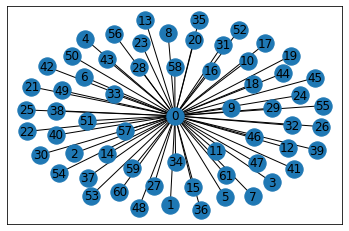

In [4]:
%%time
# Parameters
nodes = 61
transmission_rate = 0.003
gamma = 0.07
trials = 1000

# Build star graph (we will infect center node and all outer nodes will be susceptible)
G = nx.star_graph(nodes)
nx.draw_networkx(G)

# Run experiment 'trials' times
total_infected = 0
for i in range(trials):
    # Begin with only center node infected
    t, S, I, R = EoN.fast_SIR(G, transmission_rate, gamma, initial_infecteds=0)
    
    # Everyone who recovers was infected by initial infection, except initial infection themselves
    total_infected += R[-1] - 1  
    
# Print average number of infections caused by 1 initial infection -- aka R0
estimated_R0 = total_infected/trials 
print(f'Estimated R0: {estimated_R0}')

## Exploring using .transmissions() member function -- might be able to use to calculate R0 more directly

In [5]:
G = nx.fast_gnp_random_graph(10, 0.5)
data = EoN.fast_SIR(G, 0.5, gamma, initial_infecteds=0, return_full_data=True)
data.transmissions()

[(0, None, 0),
 (1.936050413459119, 0, 7),
 (2.075523530545423, 0, 3),
 (2.2580784748116356, 3, 6),
 (2.498558670957173, 7, 2),
 (2.534189997780419, 0, 5),
 (2.7692413614923703, 6, 4),
 (3.1384902359860503, 2, 8),
 (3.4458497147547673, 5, 9),
 (4.820859341682843, 6, 1)]